## Logistic Regression Model

Breast_cancer data
- Terminology 
Before we start with the analysis it is important to understand what exactly we are trying to predict and what the information provided, our variables of the dataset, mean. “Benign” refers to a type of medical condition or growth that is not cancerous or dangerous as opposed to “malignant”. The dataset contains 9 independent variables, each of them is a feature that is typically used in breast cancer analysis. Let’s break them down and understand what they mean.
- Clump thickness
is a measure of how thick the cells are within a tumor. Benign cells tend to be grouped in mono-layers, while cancerous - in multi-layer.(Sarkar et al. 2017, p. 1)
- Uniformity
of cell size and uniformity of cell shape are two characteristics that can be used to describe the appearance of cells under a microscope. Here we are checking the degree to which the cells in a sample are similar in size and shape.
- Marginal adhesion
is the degree to which cells in a tissue sample adhere, or stick, to one another at the edges of the sample. Loss of adhesion might be a sign of malignancy.
- Single
epithelial cell size is the size of individual cells in an epithelial tissue sample. Epithelial tissue is a type of tissue that covers the surface of the body and lines internal organs and structures. It is made up of cells that are tightly packed together and held in place by specialized junctions.
- Bare nuclei
refers to cells in a tissue sample that are missing their cell membranes and cytoplasm, leaving only the nucleus visible.
- Bland
chromatin is the appearance of the genetic material (chromatin) in the nucleus of a cell under a microscope. Chromatin is made up of DNA and proteins, and it contains the genetic information that controls the cell’s functions. When the chromatin in a cell’s nucleus is compact and uniform in appearance, it is said to be “bland.”
- Normal
nucleoli are small, spherical structures found within the nucleus of a cell. They are composed of DNA, RNA, and proteins and are responsible for synthesizing ribosomes, which are the cellular structures that produce proteins. Nucleoli are usually visible under a microscope and can vary in size and appearance depending on the stage of the cell cycle and the cell’s function. In normal, healthy cells, nucleoli are usually small and have a distinct, well-defined border.
- Mitosis
is the process of cell division that occurs in all living organisms. During mitosis, a single cell divides into two daughter cells, each of which contains a copy of the parent cell’s DNA. The process of mitosis is essential for the growth and repair of tissues and the production of new cells.


## Importing Libraries and data set

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("breast_cancer.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [48]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Transformation of Dataset and spliting X and Y

In [49]:
X= df.iloc[:,:9]
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [50]:
# Standardization 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_sc = sc.fit_transform(X)
X_sc=pd.DataFrame(X_sc)
X_sc.columns = list(X)
X_sc

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.348400
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.348400
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.348400
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400
...,...,...,...,...,...,...,...,...,...
678,-0.511643,-0.702212,-0.741774,-0.639366,-0.105454,-0.424217,-0.998853,-0.612927,-0.348400
679,-0.866417,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.998853,-0.612927,-0.348400
680,0.197905,2.236180,2.271896,0.059333,1.695166,-0.149582,1.860738,2.337476,0.229166
681,-0.156869,1.583204,0.932487,0.408682,-0.105454,0.125054,2.677764,1.026185,-0.348400


In [51]:
df["Class"]= df["Class"].replace({2:0,4:1}) # {} used to replace (2,4) to (0,1) by dictionary method
df["Class"]

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64

In [52]:
Y=df["Class"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64

## Model Building and fitting

In [53]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model

LogisticRegression()

In [54]:
model.fit(X_sc, Y)

LogisticRegression()

## Prediction from model

In [55]:
Y_pred = model.predict(X_sc)
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [56]:
df["Y_pred"] = model.predict(X_sc)
df["Y_pred"]

0      0
1      1
2      0
3      1
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Y_pred, Length: 683, dtype: int64

In [57]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Y_pred
0,5,1,1,1,2,1,3,1,1,0,0
1,5,4,4,5,7,10,3,2,1,0,1
2,3,1,1,1,2,2,3,1,1,0,0
3,6,8,8,1,3,4,3,7,1,0,1
4,4,1,1,3,2,1,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0,0
679,2,1,1,1,2,1,1,1,1,0,0
680,5,10,10,3,7,3,8,10,2,1,1
681,4,8,6,4,3,4,10,6,1,1,1


In [58]:
model.predict_proba(X_sc)

array([[0.98062027, 0.01937973],
       [0.09988484, 0.90011516],
       [0.98910705, 0.01089295],
       ...,
       [0.00560169, 0.99439831],
       [0.03789486, 0.96210514],
       [0.01588861, 0.98411139]])

In [59]:
sc_X=X_sc
predict_prob = model.predict_proba(sc_X)[:,1:]

In [60]:
df["predict_prob"] = model.predict_proba(sc_X)[:,1:]
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Y_pred,predict_prob
0,5,1,1,1,2,1,3,1,1,0,0,0.019380
1,5,4,4,5,7,10,3,2,1,0,1,0.900115
2,3,1,1,1,2,2,3,1,1,0,0,0.010893
3,6,8,8,1,3,4,3,7,1,0,1,0.792594
4,4,1,1,3,2,1,3,1,1,0,0,0.021178


## Confusion Matrix

In [61]:
# from sklearn.metrics import confusion_matrix

# y_true = [1, 0, 0, 1, 0, 0, 0, 0, 1]
# y_pred = [1, 0, 1, 1, 1, 0, 0, 1, 0]

# cm= confusion_matrix(y_true, y_pred)
# print(cm)

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# print(tn)
# print(fp)
# print(fn)
# print(tp)

# specificity = tn / (tn + fp)
# print("Specificity:", specificity)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y,Y_pred)
cm

array([[434,  10],
       [ 10, 229]], dtype=int64)

In [63]:
score = accuracy_score (Y, Y_pred)
score

0.9707174231332357

In [64]:
tn, fp, fn, tp = confusion_matrix(Y, Y_pred).ravel()
print("TN: ",tn)
print("FP: ",fp)
print("FN: ",fn)
print("TP: ",tp)

TN:  434
FP:  10
FN:  10
TP:  229


In [65]:
score = accuracy_score(Y, Y_pred)
score

0.9707174231332357

In [66]:
score = accuracy_score(Y, Y_pred)
print("Accuracy score:",np.round(score,3))

Accuracy score: 0.971


In [67]:
# For Sensitivity / Recall
from sklearn.metrics import recall_score
r_score = recall_score(Y,Y_pred)
print(r_score)
print("Recall Score: ",np.round(r_score,3))

0.9581589958158996
Recall Score:  0.958


In [68]:
# For SPECIFITY
TN = cm[0,0]
FP = cm[0,1]
TNR = TN / (TN + FP)
print(TNR)
print("Specificity Score: ",np.round(TNR,3))

0.9774774774774775
Specificity Score:  0.977


In [69]:
print("Accuracy score:",np.round(score,3))
print("Recall Score: ",np.round(r_score,3))
print("Specificity Score: ",np.round(TNR,3))

Accuracy score: 0.971
Recall Score:  0.958
Specificity Score:  0.977


In [70]:
# For PRECISION
from sklearn.metrics import precision_score

precision = precision_score(Y, Y_pred)
print(precision)
print("Precision Score:", np.round(precision,3))

0.9581589958158996
Precision Score: 0.958


In [71]:
# For F1 SCORE
from sklearn.metrics import f1_score

f1 = f1_score(Y, Y_pred)
print(f1)
print("F1 Score: ", f1)

0.9581589958158996
F1 Score:  0.9581589958158996


In [72]:
# ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, Y_pred)

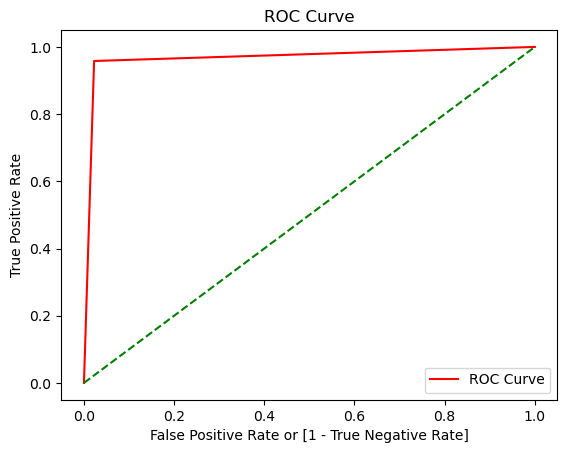

In [73]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red',label = "ROC Curve")
plt.plot([0, 1], [0, 1], color='green', linestyle='--') # x axis range is from 0 to 1, y axis range is from 0 to 1
plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [74]:
AUC = roc_auc_score(Y, Y_pred)
print("AUC: ", AUC)

AUC:  0.9678182366466885
